In [4]:
import gnn_tracking_hpo
from gnn_tracking_hpo.util.paths import find_checkpoints


In [5]:
from pathlib import Path

scripts_path = Path(gnn_tracking_hpo.__path__[0]).parent.parent / "scripts"
assert scripts_path.is_dir()

In [6]:
print(scripts_path)

/home/kl5675/Documents/22/git_sync/hpo/scripts


In [7]:
import sys
sys.path.append(str(scripts_path))

In [8]:
checkpoints = find_checkpoints("tcn-perfect-s9-tc", "474d348c")

In [9]:
checkpoint = checkpoints[-1]

In [10]:
checkpoint

PosixPath('/home/kl5675/ray_results/tcn-perfect-s9-tc/DynamicTCNTrainable_474d348c_35_attr_pt_thld=0.6120,batch_size=1,gnn_tracking_experiments_hash=52969e3f99d05b686693d886410194a9b41_2022-12-10_16-49-10/checkpoint_000040/checkpoint.pt')

In [11]:
params_file = checkpoint.parent.parent / "params.json"
assert params_file.is_file()

In [12]:
import json

In [13]:
config = json.loads(params_file.read_text())

In [14]:
config.update({"n_graphs_train": 1, "n_graphs_val": 100, "n_graphs_test": 1})

In [15]:
from tune_02_perfect_ec_sectorized_truth_cut import DynamicTCNTrainable

trainable = DynamicTCNTrainable(config)

DEBUG: Got config
{'attr_pt_thld': 0.6120378482822557,
 'batch_size': 1,
 'gnn_tracking_experiments_hash': '52969e3f99d05b686693d886410194a9b41b99b8',
 'gnn_tracking_hash': '7c7efa8c6a890d175807df185637032bfaf0e83e',
 'lr': 0.000352944777010661,
 'lw_background': 2.3636993448316492e-06,
 'lw_potential_attractive': 1.0,
 'lw_potential_repulsive': 0.5218690347548827,
 'm_L_hc': 3,
 'm_alpha_hc': 0.7946792381015035,
 'm_e_dim': 5,
 'm_ec_tnr': 1.0,
 'm_ec_tpr': 1.0,
 'm_h_dim': 5,
 'm_h_outdim': 2,
 'm_hidden_dim': 116,
 'm_interaction_edge_hidden_dim': 124,
 'm_interaction_node_hidden_dim': 120,
 'n_graphs_test': 1,
 'n_graphs_train': 1,
 'n_graphs_val': 100,
 'optimizer': 'adam',
 'q_min': 0.4007277405721034,
 'repulsive_radius_threshold': 3.0908135564502364,
 'sb': 0.10112383165612691,
 'scheduler': None,
 'sector': 9,
 'test': False,
 'training_pt_thld': 0.9,
 'training_without_noise': True,
 'training_without_non_reconstructable': True}
INFO: Loading data to cpu memory
INFO: Loading 

In [16]:
trainable.load_checkpoint(checkpoint, device="cpu")

In [17]:
from gnn_tracking.training.tcn_trainer import TCNTrainer


In [3]:
import numpy as np

all_results = []
tprs = np.linspace(1., 0.8, 5)

In [24]:
from gnn_tracking.models.edge_classifier import PerfectEdgeClassification



In [25]:
for tpr in tprs:
    trainable.trainer.model._gtcn.ec = PerfectEdgeClassification(tpr=tpr, tnr=1)
    result = TCNTrainer.test_step(trainable.trainer)
    all_results.append(result)

INFO: Starting hyperparameter scan for clustering
INFO: Completed 12 trials, pruned 0 trials
DEBUG: Evaluating all metrics for best clustering
INFO: Evaluating all metrics took 14.59 seconds
INFO: Clustering hyperparameter scan & metric evaluation took 46.29 seconds
DEBUG: Starting from params: {'eps': 0.96076051228748, 'min_samples': 1}
INFO: Starting hyperparameter scan for clustering
INFO: Completed 12 trials, pruned 0 trials
DEBUG: Evaluating all metrics for best clustering
INFO: Evaluating all metrics took 3.17 seconds
INFO: Clustering hyperparameter scan & metric evaluation took 30.42 seconds
DEBUG: Starting from params: {'eps': 0.9599247213554087, 'min_samples': 1}
INFO: Starting hyperparameter scan for clustering
INFO: Completed 5 trials, pruned 7 trials
DEBUG: Evaluating all metrics for best clustering
INFO: Evaluating all metrics took 16.15 seconds
INFO: Clustering hyperparameter scan & metric evaluation took 47.31 seconds
DEBUG: Starting from params: {'eps': 0.95992472135540

In [33]:
all_tc_dm = [c["tc_trk.double_majority"] for c in all_results]
all_pt09_dm = [c["trk.double_majority_pt0.9"] for c in all_results]
all_pt15_dm = [c["trk.double_majority_pt1.5"] for c in all_results]

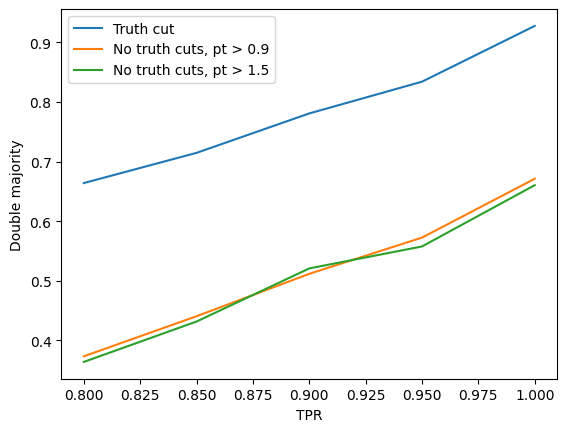

In [37]:
from matplotlib import pyplot as plt

plt.plot(tprs, all_tc_dm, label="Truth cut")
plt.plot(tprs, all_pt09_dm, label="No truth cuts, pt > 0.9")
plt.plot(tprs, all_pt15_dm, label="No truth cuts, pt > 1.5")
plt.xlabel("TPR")
plt.ylabel("Double majority")
plt.legend()

In [31]:
all_results[0]

{'acc_pt1.5': 1.0,
 'TPR_pt1.5': 1.0,
 'TNR_pt1.5': 1.0,
 'FPR_pt1.5': 0.0,
 'FNR_pt1.5': 0.0,
 'total': 0.6013830289244652,
 'potential_attractive': 0.07452583936974407,
 'potential_attractive_weighted': 0.07452583936974407,
 'potential_repulsive': 1.0095536339282989,
 'potential_repulsive_weighted': 0.5268547804714456,
 'background': 1.0,
 'background_weighted': 2.3636993448316496e-06,
 'v_measure': 0.9270779764854101,
 'homogeneity': 0.8821345383513877,
 'completeness': 0.97732738633534,
 'trk.n_particles': 227.59,
 'trk.n_cleaned_clusters': 152.64,
 'trk.perfect': 0.44236301142373724,
 'trk.double_majority': 0.5716244350956515,
 'trk.lhc': 0.7883573742155922,
 'trk.fake_perfect': 0.23130284385995442,
 'trk.fake_double_majority': 0.10204142018804017,
 'trk.fake_lhc': 0.21164262578440787,
 'trk.n_particles_pt0.5': 103.93,
 'trk.n_cleaned_clusters_pt0.5': 76.7,
 'trk.perfect_pt0.5': 0.5442722704275547,
 'trk.double_majority_pt0.5': 0.6519702543476885,
 'trk.lhc_pt0.5': 0.7935421169137